In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
sb.set() # set the default Seaborn style for graphics

#For this attempt, we will change y to reflect scammed instead of defaulting.

In [2]:
bankdata = pd.read_csv('bank.csv',sep=';')

In [3]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


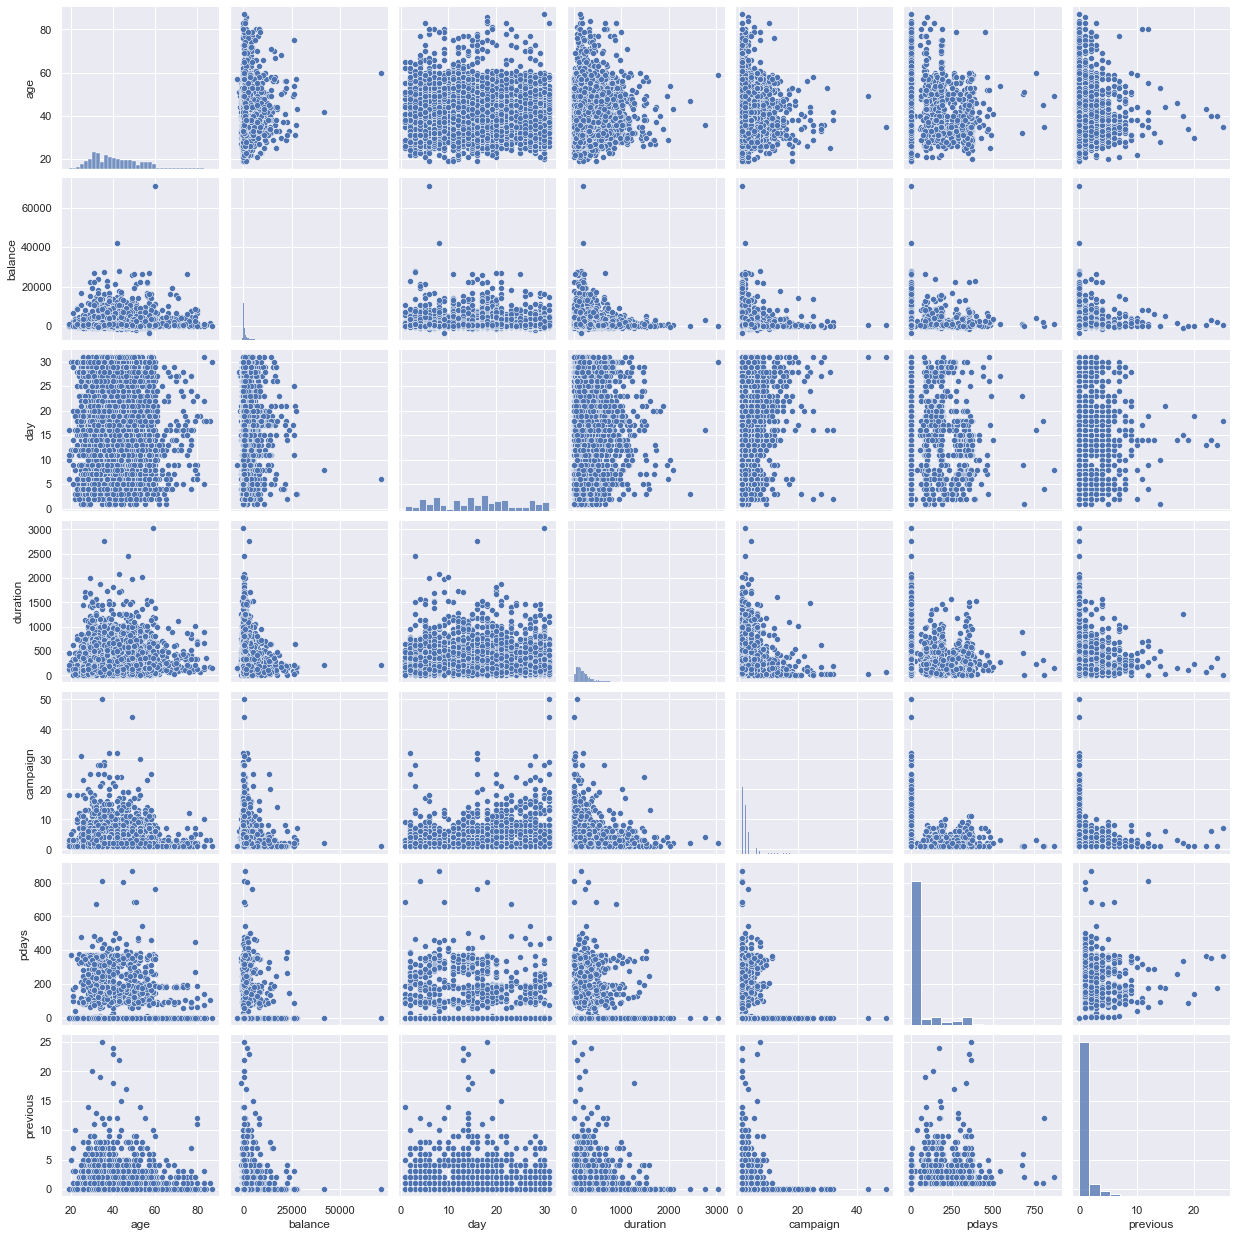

In [5]:
sb.pairplot(bankdata)

In [6]:
bankdata.count()

age          4521
job          4521
marital      4521
education    4521
default      4521
balance      4521
housing      4521
loan         4521
contact      4521
day          4521
month        4521
duration     4521
campaign     4521
pdays        4521
previous     4521
poutcome     4521
y            4521
dtype: int64

In [7]:
bankdata['job'] =bankdata['job'].astype('category').cat.codes
bankdata['marital'] =bankdata['marital'].astype('category').cat.codes
bankdata['education'] =bankdata['education'].astype('category').cat.codes
bankdata['default'] =bankdata['default'].astype('category').cat.codes
bankdata['housing'] =bankdata['housing'].astype('category').cat.codes
bankdata['loan'] =bankdata['loan'].astype('category').cat.codes
bankdata['contact'] =bankdata['contact'].astype('category').cat.codes
bankdata['y'] =bankdata['y'].astype('category').cat.codes

del bankdata["day"]
del bankdata["month"]
del bankdata["duration"]
del bankdata["poutcome"]


In [8]:
scammed = pd.DataFrame(bankdata['y'])  # Response
scammed.describe()

,y
count,4521.000000
mean,0.115240
std,0.319347
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
scammed.value_counts()

y
0    4000
1     521
dtype: int64

In [10]:
bankdata

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,y
0,30,10,1,0,0,1787,0,0,0,1,-1,0,0
1,33,7,1,1,0,4789,1,1,0,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,4,-1,0,0
4,59,1,1,1,0,0,1,0,2,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,5,-1,0,0
4517,57,6,1,2,1,-3313,1,1,2,1,-1,0,0
4518,57,9,1,1,0,295,0,0,0,11,-1,0,0
4519,28,1,1,1,0,1137,0,0,0,4,211,3,0


In [11]:
corr = bankdata.corr()
corr

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,y
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.005148,-0.008894,-0.003511,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,-0.002739,-0.022760,0.005029,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.005915,0.017050,0.038028,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,-0.001723,0.012077,0.023983,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.012348,-0.026317,-0.026656,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.009976,0.009437,0.026196,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.003574,0.116893,0.038621,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,0.017120,-0.031086,-0.022115,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,0.012278,-0.243223,-0.187232,-0.133595
campaign,-0.005148,-0.002739,0.005915,-0.001723,-0.012348,-0.009976,-0.003574,0.017120,0.012278,1.000000,-0.093137,-0.067833,-0.061147


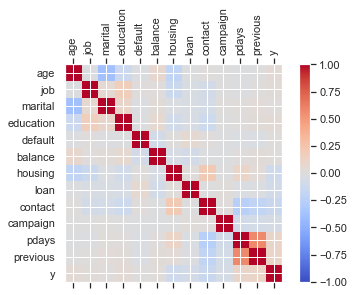

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(bankdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(bankdata.columns)
ax.set_yticklabels(bankdata.columns)
plt.show()

# Variables that have higher interference with being scammed are age, housing, loan and contact

In [18]:
y = pd.DataFrame(bankdata["y"]) #Response
x = pd.DataFrame(bankdata[["age","housing", "loan", "contact"]]) #Predictor

In [22]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(x, y)                    # train the decision tree model

DecisionTreeClassifier(max_depth=4)

[Text(404.55, 587.0880000000001, 'age <= 60.5\ngini = 0.204\nsamples = 4521\nvalue = [4000, 521]\nclass = Not Scammed'),
 Text(223.20000000000002, 456.624, 'contact <= 1.5\ngini = 0.192\nsamples = 4394\nvalue = [3921, 473]\nclass = Not Scammed'),
 Text(111.60000000000001, 326.1600000000001, 'housing <= 0.5\ngini = 0.232\nsamples = 3073\nvalue = [2661, 412]\nclass = Not Scammed'),
 Text(55.800000000000004, 195.69600000000003, 'loan <= 0.5\ngini = 0.27\nsamples = 1493\nvalue = [1253, 240]\nclass = Not Scammed'),
 Text(27.900000000000002, 65.23200000000008, 'gini = 0.293\nsamples = 1259\nvalue = [1035, 224]\nclass = Not Scammed'),
 Text(83.7, 65.23200000000008, 'gini = 0.127\nsamples = 234\nvalue = [218, 16]\nclass = Not Scammed'),
 Text(167.4, 195.69600000000003, 'age <= 55.5\ngini = 0.194\nsamples = 1580\nvalue = [1408, 172]\nclass = Not Scammed'),
 Text(139.5, 65.23200000000008, 'gini = 0.201\nsamples = 1495\nvalue = [1326, 169]\nclass = Not Scammed'),
 Text(195.3, 65.23200000000008, '

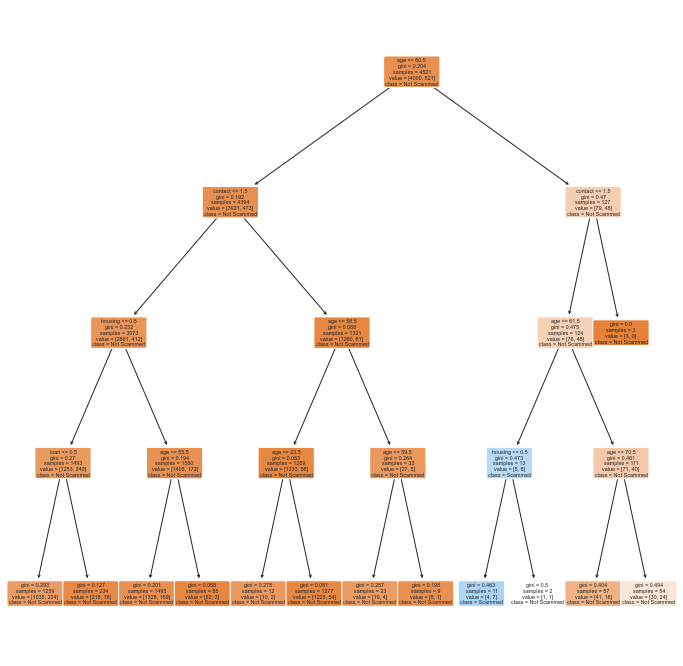

In [23]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x.columns, 
          class_names=["Not Scammed","Scammed"])

# As seen from above, we can leverage available data to easily determine factors or groups of people who are more likely to be scammed. Traverse down the DT to groups where "Scammed" is prevalent and identify these customers early to prevent future cases.